## Time Series Analysis - Onion Price Prediction

Onion is an unavoidable recipe in the Indian dishes. India, being the second largest producer of Onion in the world, this mandatory vegetable is given the least importance in the indian markets in terms of protecting the mass production. As a result, there are fluctuations at times during the monsoon season.

This project is a result to predict the Onion Price that will help the ordinary people to plan accordingly during the fluctuations.

### 1. Importing the necessary libraries

In [71]:
#Importing the data preprocessing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#Import statsmodel libraries for time series analysis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

### 2. Loading the dataset

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/MonthWiseMarketArrivals_Clean.csv')

#### 2.1 Checking the Top 5 rows in the dataset

In [73]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


#### 2.2 Checking the Bottom 5 rows in the dataset

In [74]:
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


### 3. Data Pre-processing

#### 3.1 Converting the "date" column from string type to the date type

In [75]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format = True)
df["date"].head()

0   2005-01-01
1   2006-01-01
2   2010-01-01
3   2011-01-01
4   2012-01-01
Name: date, dtype: datetime64[ns]

#### 3.2 Checking the min and max values in the converted date column

In [76]:
print("Minimum date : ", df.date.min())
print("Maximum date : ", df.date.max())

Minimum date :  1996-01-01 00:00:00
Maximum date :  2016-02-01 00:00:00


#### 3.3 Creating a new column

Creating a new column containing the number of days from the minimum date. Calculation is provided below.

timeIndex = date in the current record - minimum date

In [77]:
df["timeIndex"] = df.date - df.date.min()
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,timeIndex
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01,3288 days
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01,3653 days
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01,5114 days
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01,5479 days
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01,5844 days


#### 3.4 Making the "date" column as the index of the dataframe

In [78]:
df = df.set_index(df["date"])
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,timeIndex
date,,,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01,3288 days
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01,3653 days
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01,5114 days
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01,5479 days
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01,5844 days


#### 3.5 Sorting the dateframe based on the date (asc order)

In [79]:
df = df.sort_index()
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,timeIndex
date,,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01,0 days
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01,31 days
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01,60 days
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01,91 days
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01,121 days


#### 3.6 Filtering the data Based on the city Bangalore and Chennai

In [80]:
#Filtering the dataframe based on the city - Bangalore
dfBang = df.loc[df.city =="BANGALORE"].copy()
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,timeIndex
date,,,,,,,,,,,
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,2922 days
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,2953 days
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,2982 days
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,3013 days
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,3043 days


In [81]:
#Filtering the dataframe based on the city - Chennai
dfChn = df.loc[df.city == "CHENNAI"].copy()
dfChn.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,timeIndex
date,,,,,,,,,,,
2004-01-01,CHENNAI,January,2004,103400,798,1019,910,TN,CHENNAI,2004-01-01,2922 days
2004-02-01,CHENNAI,February,2004,87800,776,969,873,TN,CHENNAI,2004-02-01,2953 days
2004-03-01,CHENNAI,March,2004,102180,506,656,580,TN,CHENNAI,2004-03-01,2982 days
2004-04-01,CHENNAI,April,2004,83300,448,599,527,TN,CHENNAI,2004-04-01,3013 days
2004-05-01,CHENNAI,May,2004,84850,462,596,529,TN,CHENNAI,2004-05-01,3043 days


#### 3.7 Dropping the columns that are not needed for analysis in the Bangalore Dataframe

In [82]:
dfBang = dfBang.drop(["market","month","year","priceMin","priceMax","state","city","date"], axis = 1)
dfBang.head()

,quantity,priceMod,timeIndex
date,,,
2004-01-01,227832,991,2922 days
2004-02-01,225133,793,2953 days
2004-03-01,221952,556,2982 days
2004-04-01,185150,465,3013 days
2004-05-01,137390,455,3043 days


### 4. Exploratory Data Analysis

#### 4.1 Plotting the distribution of price in the Bangalore dataframe

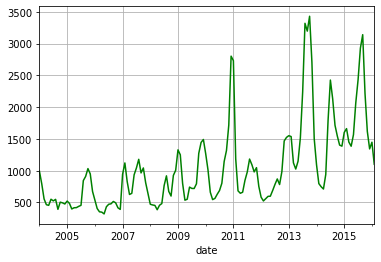

In [83]:
dfBang.priceMod.plot(color = "green", grid = True)

#### 4.2 Converting the timeIndex column value from days to months using "timedelta" function

In [84]:
dfBang["timeIndex"] = dfBang["timeIndex"] / np.timedelta64(1,'M')
dfBang.head()

,quantity,priceMod,timeIndex
date,,,
2004-01-01,227832,991,96.001971
2004-02-01,225133,793,97.020473
2004-03-01,221952,556,97.973264
2004-04-01,185150,465,98.991766
2004-05-01,137390,455,99.977412


#### 4.3 Rounding the timeIndex value to integer from decimal value

In [85]:
dfBang["timeIndex"] = dfBang["timeIndex"].round(0).astype(int)
dfBang.head()

,quantity,priceMod,timeIndex
date,,,
2004-01-01,227832,991,96
2004-02-01,225133,793,97
2004-03-01,221952,556,98
2004-04-01,185150,465,99
2004-05-01,137390,455,100


#### 4.4 Plotting the Histogram to find the distribution of price value in Bangalore dataframe

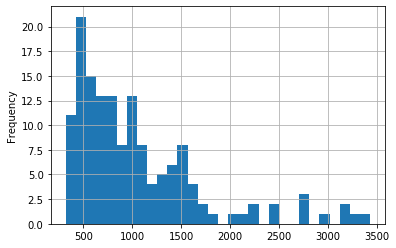

In [86]:
dfBang.priceMod.plot(kind = "Hist", bins = 30, grid = True)

### 5. Time Series Analysis

#### 5.1 Performing the seasonal decomposition

Performing seasonal decomposition of the priceMod column. Finding out the trend, seasonality and residual(error) pattern present in the Bangalore dataframe. THe model considered here is "additive".

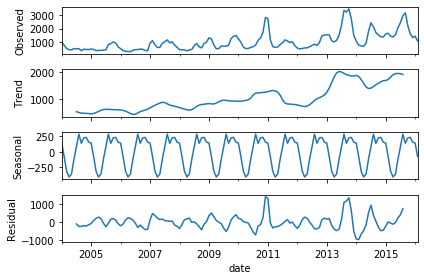

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_dataset = seasonal_decompose(dfBang.priceMod, model = "additive")
decomposed_dataset.plot()
plt.show()

#### 5.2 Creating a function for calculating the Rolling Mean & Standard Deviation

We are creating a genaralized function for calculating the rolling mean and standard deviation. 

The window size is taken as 12 becasue the number of months in the input is 12.

In [94]:
dfBang.priceMod.rolling(window = 12).mean().head(20)

date
2004-01-01           NaN
2004-02-01           NaN
2004-03-01           NaN
2004-04-01           NaN
2004-05-01           NaN
2004-06-01           NaN
2004-07-01           NaN
2004-08-01           NaN
2004-09-01           NaN
2004-10-01           NaN
2004-11-01           NaN
2004-12-01    562.666667
2005-01-01    523.583333
2005-02-01    497.916667
2005-03-01    484.750000
2005-04-01    480.750000
2005-05-01    477.750000
2005-06-01    468.416667
2005-07-01    462.583333
2005-08-01    487.166667
Name: priceMod, dtype: float64

In [99]:
def rolling_means(timeseries_column_name):
    rolling_mean = timeseries_column_name.rolling(window = 12).mean()
    rolling_std  = timeseries_column_name.rolling(window = 12).std()
    timeseries_column_name.plot(color = 'Red', label = 'Original series')
    rolling_mean.plot(color = "Green", label = "Rolling Mean")
    rolling_std.plot(color = "Blue", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()

#### 5.3 Creating a function for calculating the ADF test results

In [100]:
def adf_test(timeseries_column_name):
    dftest = adfuller(timeseries_column_name, autolag = 'AIC')
    print(dftest)

#### 5.4 Creating a function to call the above two functions which provides the test stationarity

In [101]:
def test_stationarity(timeseries_column_name):
    rolling_means(timeseries_column_name)
    adf_test(timeseries_column_name)

#### 5.5 Calling the test_stationarity function and see the results(Round 1)

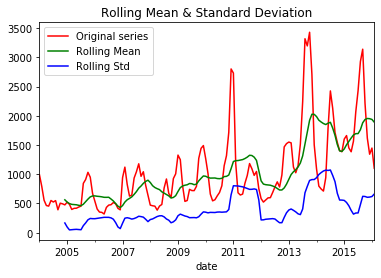

(-4.004401077671534, 0.00138764044231547, 2, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, 1851.0289972769456)


In [102]:
test_stationarity(dfBang.priceMod)

#### 5.6 Creating a new column priceModLog

As the priceMod column value is not normally distributed, we are creating a new column named priceModLog and taking the log of the priceMod column values to make it normally distributed.

In [103]:
dfBang["priceModLog"] = np.log(dfBang.priceMod)
dfBang.head()

,quantity,priceMod,timeIndex,priceModLog
date,,,,
2004-01-01,227832,991,96,6.898715
2004-02-01,225133,793,97,6.675823
2004-03-01,221952,556,98,6.320768
2004-04-01,185150,465,99,6.142037
2004-05-01,137390,455,100,6.120297


#### 5.7 Visualizing the distribution of the priceModLog column using the Histogram

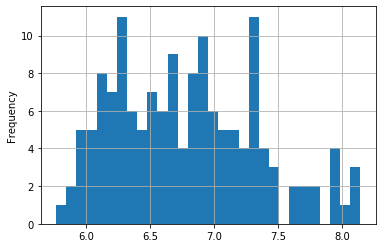

In [105]:
dfBang.priceModLog.plot(kind = "hist", bins = 30, grid = True)

#### 5.8 Calling the test_stationarity func and see the results (Round 2)

Checking the test_stationarity results after taking the log transformation (Round 2)

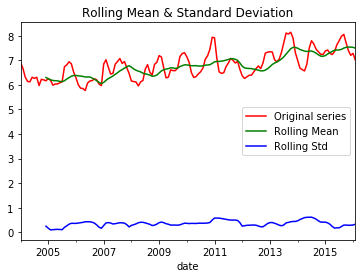

(-3.650644034509109, 0.004863452362946618, 2, 143, {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}, -30.104399768798487)


In [106]:
test_stationarity(dfBang.priceModLog)

#### 5.9 Creating a new column priceModLogShift

Creating a new column priceModLogShift and shifting the values to one row below.

In [117]:
dfBang["priceModLogShift"] = dfBang.priceModLog.shift()
dfBang = dfBang.iloc[1:] #Removing the first row in the dataframe as it contains null
dfBang.head()

,quantity,priceMod,timeIndex,priceModLog,priceModLogShift
date,,,,,
2004-02-01,225133,793,97,6.675823,6.898715
2004-03-01,221952,556,98,6.320768,6.675823
2004-04-01,185150,465,99,6.142037,6.320768
2004-05-01,137390,455,100,6.120297,6.142037
2004-06-01,311445,551,101,6.311735,6.120297


#### 5.10 Visualizing the distribution of the priceModLogShift column using the Histogram

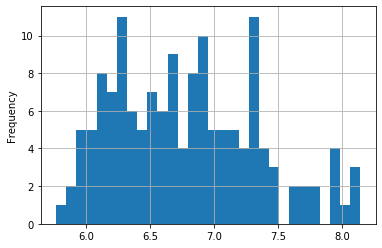

In [118]:
dfBang.priceModLogShift.plot(kind = "hist", bins = 30, grid = True)

#### 5.11 Calling the test_stationarity func and see the results (Round 3)

Checking the test_stationarity results after shifting the column priceModLog transformation (Round 3)

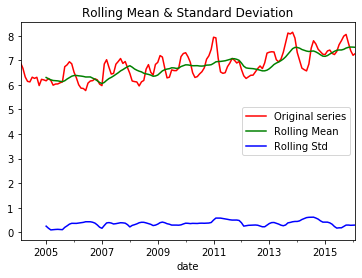

(-3.5009738150170975, 0.007962119622070716, 2, 142, {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}, -30.72542541366701)


In [119]:
test_stationarity(dfBang.priceModLogShift)

#### 5.12 Creating a new column priceModLogDiff

Creating a new column priceModLogDiff by subracting the difference between the priceModLog and priceModLogShift columns.

In [120]:
dfBang["priceModLogDiff"] = dfBang.priceModLog - dfBang.priceModLogShift
dfBang.head()

,quantity,priceMod,timeIndex,priceModLog,priceModLogShift,priceModLogDiff
date,,,,,,
2004-02-01,225133,793,97,6.675823,6.898715,-0.222891
2004-03-01,221952,556,98,6.320768,6.675823,-0.355055
2004-04-01,185150,465,99,6.142037,6.320768,-0.178731
2004-05-01,137390,455,100,6.120297,6.142037,-0.021740
2004-06-01,311445,551,101,6.311735,6.120297,0.191437


#### 5.13 Visualizing the distribution of the priceModLogDiff column

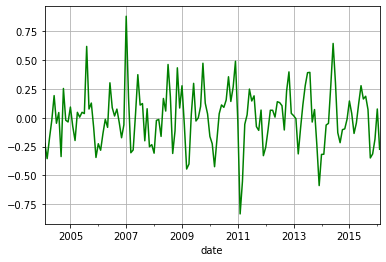

In [122]:
dfBang.priceModLogDiff.plot(color = 'Green', grid = True)

#### 5.14 Calling the test_stationarity func and see the results (Round 4)

Checking the test_stationarity results using the priceModLogDiff column values(Round 4)

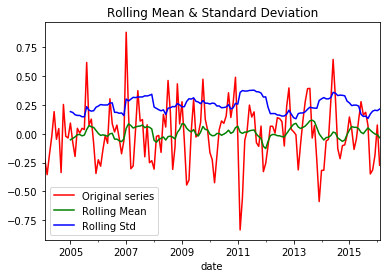

(-7.2932457728865385, 1.3993046206446027e-10, 7, 137, {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603}, -27.105948037249647)


In [124]:
test_stationarity(dfBang.priceModLogDiff)

### 6. Model Building

The next section is the model building for Time series analysis.

We consider using the ARIMA model, which is the best for Time series analysis.

ARIMA models are used because they can reduce a non-stationary series to a stationary series using a sequence of differencing steps.

Autoregressive Integrated Moving Average ARIMA(p, d, q) Models for Time Series Analysis.

#### 6.1 Building the ARIMA model

First we are creating a function called evaluate_arima_model and finding the AIC results.

AIC stands for Akaike Information Criterion. That means, AIC value gives the goodness of fit of the model.

Lower is the AIC score, better is the goodness of fit and less chance of overfit.

But one AIC score alone is not useful. We should have AIC score for good number of iterations and compare it with the other values to find the best AIC value.

In [126]:
from statsmodels.tsa.arima_model import ARIMA

def evaluate_arima_model(timeseries_column_name, arima_order):
    model = ARIMA(timeseries_column_name, order = arima_order)
    arima_results = model.fit()
    aic = arima_results.aic
    return aic

#### 6.2 Finding the Best AIC score

passing number of iterations for the arima model and finding the best AIC score/value.

we provide values for p, d, q in order to perform few iterations.

p = [0,1,2]

d = [0,1]

q = [0,1,2]

Inorder to perform interations with the combination of values in p, d, q order, we write the code with for loop.

In [139]:
# The below two line of code is for ignoring the warnings produced by the IDE. 
#If you remove these two lines the program will execute as usual but with warnings.
import warnings
warnings.filterwarnings("ignore")

p_values = [0,1,2]
d_values = [0,1]
q_values = [0,1,2]

for p in p_values:
    for d in d_values:
        for q in q_values:
            arima_order = (p,d,q)
            try:
                aic_score = evaluate_arima_model(dfBang.priceModLogDiff, arima_order)
                print('ARIMA ORDER : %s  AIC SCORE : %.3f' %(arima_order, aic_score))
            except ValueError:
                aic_score, arima_order
                continue

ARIMA ORDER : (0, 0, 0)  AIC SCORE : 9.724
ARIMA ORDER : (0, 0, 1)  AIC SCORE : -17.753
ARIMA ORDER : (0, 0, 2)  AIC SCORE : -17.495
ARIMA ORDER : (0, 1, 0)  AIC SCORE : 34.696
ARIMA ORDER : (0, 1, 1)  AIC SCORE : 30.678
ARIMA ORDER : (0, 1, 2)  AIC SCORE : -10.350
ARIMA ORDER : (1, 0, 0)  AIC SCORE : -14.085
ARIMA ORDER : (1, 0, 1)  AIC SCORE : -16.721
ARIMA ORDER : (1, 1, 0)  AIC SCORE : 34.026
ARIMA ORDER : (2, 0, 0)  AIC SCORE : -19.882
ARIMA ORDER : (2, 0, 1)  AIC SCORE : -44.548
ARIMA ORDER : (2, 1, 0)  AIC SCORE : 28.047
ARIMA ORDER : (2, 1, 1)  AIC SCORE : -12.359


#### 6.3 Running the ARIMA model

So, from the above evaluation we can conclude that AIRMA ORDER (2,0,1) gives the best AIC SCORE of -44.548 which is the lowest one and best for goodness of fit.

Now, let's run the ARIMA model with this ARIMA ORDER and find the results.

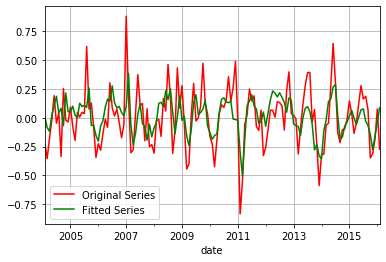

In [141]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(dfBang.priceModLogDiff, order = (2,0,1))
arima_results = model.fit()

dfBang.priceModLogDiff.plot(color = "Red", grid = True, label = "Original Series")
arima_results.fittedvalues.plot(color = 'Green', grid = True, label = "Fitted Series")
plt.legend(loc = "best")

Based on the above visualisation we can conclude that we have created the model which can predict the future values of the time series.

This conclusion is based on the above visualization, which shows that original and the fitted series by the model is of good fit.

#### 6.4 Reverse transformation of the fitted values

Now, we need to reverse the transformations that we have done before to predict the actual values of the onion price.

In [154]:
pred_priceModLogDiff = pd.Series(arima_results.fittedvalues, copy = True)
pred_priceModLogDiff.head()

date
2004-02-01    0.008824
2004-03-01   -0.085040
2004-04-01   -0.118119
2004-05-01    0.021076
2004-06-01    0.109163
dtype: float64

#### 6.6 Return back to the log value for the fitted values

In [159]:
pred_arima_log = pd.Series(dfBang.priceModLog.iloc[0], index = dfBang.index)
pred_arima_log = pred_arima_log.add(pred_priceModLogDiff, fill_value = 0)
pred_arima_log.head()

date
2004-02-01    6.684647
2004-03-01    6.590783
2004-04-01    6.557705
2004-05-01    6.696899
2004-06-01    6.784986
dtype: float64

#### 6.7 Return back to the original value of prediction

Calculating the original predicted value by taking the exponential of the piror value.

In [160]:
pred_priceMod = np.exp(pred_arima_log)
pred_priceMod.head()

date
2004-02-01    800.028105
2004-03-01    728.350884
2004-04-01    704.652459
2004-05-01    809.890739
2004-06-01    884.467990
dtype: float64

#### 6.8 Visualizing the distribution of the Original values vs Predicted values

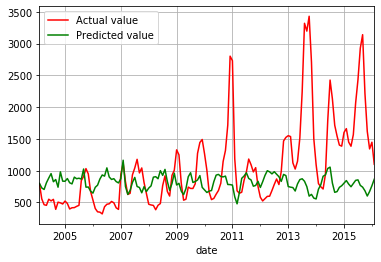

In [161]:
dfBang.priceMod.plot(color = 'Red', grid = True, label = 'Actual value')
pred_priceMod.plot(color = 'Green', grid = True, label = "Predicted value")
plt.legend(loc = "best")

So, we have built a Time series model which can predict the future price of the onion when given the inputs in depicited time range.